# 통계 1일차

In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import matplotlib
matplotlib.rc('axes', unicode_minus = False)

# 기술통계

In [4]:
# myscars 데이터 가져오기(데이터의 경로 확인: mycars.csv)
ds_mycars = pd.read_csv("mycars.csv", engine = "python")

In [5]:
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [6]:
# 요약통계량
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [7]:
des = ds_mycars.describe().round(3)

In [8]:
des['displacement']

count    234.000
mean       3.472
std        1.292
min        1.600
25%        2.400
50%        3.300
75%        4.600
max        7.000
Name: displacement, dtype: float64

In [9]:
des['displacement']['count'] 

234.0

In [10]:
# 변동계수
coefficient_of_variation  = des['displacement']['count'] / des['displacement']['std']
print(coefficient_of_variation)

181.11455108359132


In [11]:
# 자동차 모델별, mpg 데이터 subset
df = ds_mycars[['model', 'mpg']]
print(df)

      model  mpg
0        a4   18
1        a4   21
2        a4   20
3        a4   21
4        a4   16
..      ...  ...
229  passat   19
230  passat   21
231  passat   16
232  passat   18
233  passat   17

[234 rows x 2 columns]


In [12]:
# 모델 별 데이터 수 평균 표준편차
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [13]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)

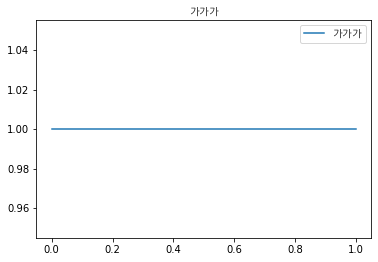

In [14]:
fig = plt.figure()  
plt.plot((1,1), label='가가가')  
plt.title('가가가',fontproperties=fprop)  
plt.legend(prop=fprop)  
plt.show()  

In [15]:
ds_mycars

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [16]:
# 자동차 제조사별, mpg 데이터 subset
df_man = ds_mycars[['manufacturer', 'mpg']]
print(df_man)
# 제조사별 데이터 수 평균 표준편차
df_man.groupby('manufacturer').describe()

    manufacturer  mpg
0           audi   18
1           audi   21
2           audi   20
3           audi   21
4           audi   16
..           ...  ...
229   volkswagen   19
230   volkswagen   21
231   volkswagen   16
232   volkswagen   18
233   volkswagen   17

[234 rows x 2 columns]


mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [17]:
# 자동차 구동 방식별, mpg 데이터 subset
df_auto = ds_mycars[['automatic', 'mpg']]
print(df_auto)
# 구동 방식별 데이터 수 평균 표준편차
df_auto.groupby('automatic').describe()

    automatic  mpg
0        auto   18
1      manual   21
2      manual   20
3        auto   21
4        auto   16
..        ...  ...
229      auto   19
230    manual   21
231      auto   16
232    manual   18
233      auto   17

[234 rows x 2 columns]


mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [18]:
ds_Exh_QC1 = pd.read_csv("EXH_QC1.csv", engine = "python")
print(ds_Exh_QC1)

      Flaws   Period  Strength  Baking Time  Cabbage weight
0   Scratch      Day      37.6     0.798922             3.6
1   Scratch      Day      38.6     0.849020             2.9
2      Peel      Day      37.2     0.816163             2.8
3      Peel      Day      36.4     0.758266             2.6
4    Smudge      Day      38.6     0.815894             3.4
5   Scratch      Day      39.0     0.807477             3.2
6     Other      Day      37.2     0.809068             2.2
7     Other  Evening      36.1     0.766400             2.6
8      Peel  Evening      35.9     0.742243             2.6
9      Peel  Evening      37.1     0.751118             2.4
10     Peel  Evening      36.9     0.740629             2.4
11     Peel  Evening      37.5     0.751495             2.6
12  Scratch  Evening      36.3     0.738863             3.4
13  Scratch  Evening      38.1     0.827428             2.4
14     Peel    Night      39.0     0.818172             2.1
15  Scratch    Night      36.9     0.740

In [19]:
df = ds_Exh_QC1[['Flaws','Period']]
print(df)

      Flaws   Period
0   Scratch      Day
1   Scratch      Day
2      Peel      Day
3      Peel      Day
4    Smudge      Day
5   Scratch      Day
6     Other      Day
7     Other  Evening
8      Peel  Evening
9      Peel  Evening
10     Peel  Evening
11     Peel  Evening
12  Scratch  Evening
13  Scratch  Evening
14     Peel    Night
15  Scratch    Night
16   Smudge    Night
17  Scratch    Night
18     Peel    Night
19     Peel    Night
20     Peel    Night
21     Peel    Night
22    Other    Night
23    Other    Night
24  Scratch    Night
25  Scratch    Night
26     Peel    Night
27  Scratch    Night
28   Smudge    Night
29  Scratch    Night
30    Other    Night
31  Scratch    Night
32  Scratch    Night
33     Peel  Weekend
34     Peel  Weekend
35     Peel  Weekend
36   Smudge  Weekend
37   Smudge  Weekend
38   Smudge  Weekend
39    Other  Weekend


In [20]:
count = df['Flaws'].value_counts().sort_index()
print(count)

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64


In [21]:
cumcnt = np.cumsum(count)
print(cumcnt)

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64


In [22]:
percent = count / sum(count) * 100
percent

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64

In [23]:
cumpct = np.cumsum(percent)
cumpct

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64

In [24]:
count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct})
count_data

,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [25]:
count_data.columns.name = 'Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [26]:
count2 = df['Period'].value_counts().sort_index()

In [27]:
cumcnt2 = np.cumsum(count2)
percent2 = count2 / sum(count2) *100
cumpct2 = np.cumsum(percent2)
count_data2 = pd.DataFrame({'Count': count2, 'CumCnt': cumcnt2, 'Percent': percent2, 'CumPct': cumpct2})
count_data2.columns.name = 'Period'
count_data2

Period,Count,CumCnt,Percent,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


In [28]:
# myscars 데이터 가져오기(데이터의 경로 확인: mycars.csv)
ds_mycars = pd.read_csv("mycars.csv", engine = "python")
ds_mycars

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [29]:
df = ds_mycars[['model', 'mpg']]
count = df['model'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

In [30]:
count_data  = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'Cumpct': cumpct})
count_data.columns.name = 'model'
count_data

model,Count,CumCnt,Percent,Cumpct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


# 정규 분포

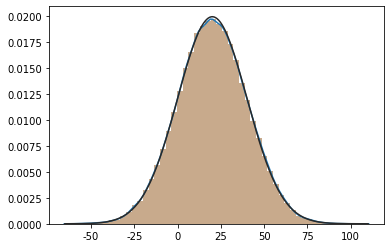

In [31]:
# 정규분포 그리기
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)
# 평균: 20, 표주편차: 2, 데이터 수: 100000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(20,20,100000)
# histogram
sns.distplot(normal)
sns.distplot(normal, fit = stats.norm, kde= False)

In [32]:
# 데이터 확인, 소수점 3
normal.round(3)

array([29.429, -3.82 , 48.654, ..., 20.586, -4.411, 27.682])

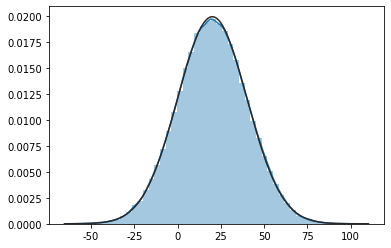

In [33]:
sns.distplot(normal, fit = stats.norm, kde= True)

In [34]:
# 정규분포 확률계산
mu = 115
sigma = 20
x = 135
prob = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x,(1-prob)*100))

135분 이상 걸리는 A/S 작업 비율: 15.9%


In [35]:
# 정규분포 확률계산
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print(" 나의 키는{0}cm입니다, 나는 상위 {1:.1f}%에 위치합니다.".format(x,(1-prob)*100))

 나의 키는180cm입니다, 나는 상위 15.9%에 위치합니다.


In [36]:
# 누적확률 값 계산
mu = 12
sigma = 3
x1 = 15

# prob1: 누적확률 15이하 값 계산
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}%에 해당함".format(mu, x1, (prob1 - 0.5) *100))

12km 이상 15km 이하를 달릴 확률은 34.1%에 해당함


In [37]:
# HW
# 누적확률 값 계산
mu = 12
sigma = 3
x1 = 15

# prob1: 누적확률 9이상 15이하 값 계산
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}%에 해당함".format(mu, x1, 2*(prob1 - 0.5) *100))

# prob2: 누적확률 15이상 값 계산
prob1 = stats.norm.cdf(x1, mu, sigma)
print("{0}km 이상을 달릴 확률은 {1:.1f}%에 해당함".format(x1, (1-prob1) *100))

12km 이상 15km 이하를 달릴 확률은 68.3%에 해당함
15km 이상을 달릴 확률은 15.9%에 해당함


array([ 0.471, -1.191,  1.433, ...,  0.029, -1.221,  0.384])

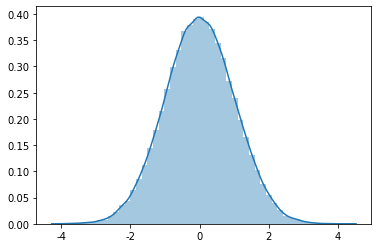

In [38]:
# 표준정규분포 그리기 [연습]

# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(1234)

# 평균: 0, 표준편차: 1, 데이터 수: 100,000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(0, 1, 100000)
# histogram
sns.distplot(normal)

# 데이터 확인, 소수점 3
normal.round(3)

array([-0.376, -0.04 ,  0.006, ..., -0.274, -1.421,  1.545])

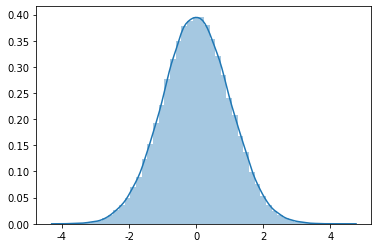

In [39]:
# 표준정규분포 그리기 [실습]

# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
#np.random.seed(1234)

# 평균: 0, 표준편차: 1, 데이터 수: 100,000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(0, 1, 100000)
# histogram
sns.distplot(normal)

# 데이터 확인, 소수점 3
normal.round(3)

# t 분포

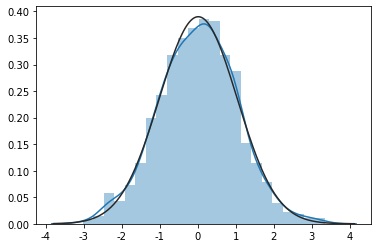

In [40]:
# t분포
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(1234)
# 자유도: 29, 데이터 수: 1000개의 t분포를 따르는 데이터 생성
t_df29 = np.random.standard_t(df = 29, size =1000)
# histogram, fit: 정규분포 선 생성, kde: t분포의 kde 생성 안함
sns.distplot(t_df29, fit = stats.norm, kde = True)

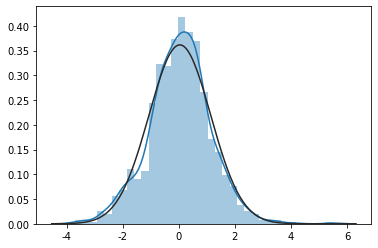

In [41]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(1234)
# 자유도: 10, 데이터 수: 1000개의 t 분포를 따르는 데이터 생성
t_df10 = np.random.standard_t(df = 10, size = 1000)
# histogram, fit: 정규분포 선 생성 kde: t분포의 kde 생성 안 함
#sns.distplot(t_df10, fit = stats.norm, kde = False)
sns.distplot(t_df10, fit = stats.norm, kde = True)

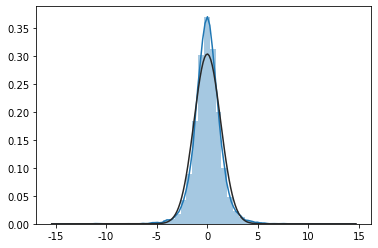

In [42]:
# 실습
t_df5 = np.random.standard_t(df = 5, size = 10000)
sns.distplot(t_df5, fit = stats.norm, kde = True)

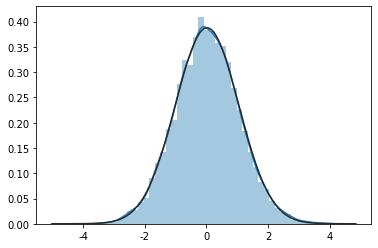

In [43]:
# 실습
t_df50 = np.random.standard_t(df = 50, size = 10000)
sns.distplot(t_df50, fit = stats.norm, kde = True)

In [44]:
# 연습 t분포
t = 1.53
df = 5
#누적확률 값 계산
prob = stats.t.cdf(t,df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.907


In [45]:
# 실습 t분포
t = 2
df = 100
#누적확률 값 계산
prob = stats.t.cdf(t,df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.976


# 카이제곱 분포

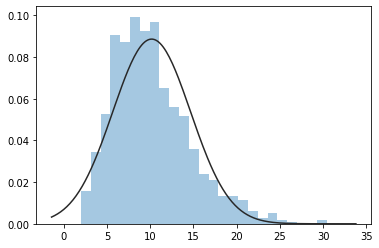

In [46]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed= 1234)

# 자유도: 10, 데이터 수: 1000개의 x2 분포를 따르는 데이터 생성
chisq_df10 = np.random.chisquare(df = 10, size = 1000)

# histogram, fit:정규부포 선 생성, kde: x2 분포의 kde 생성 안함
# sns.distplot(chisq_df10, fit = st_modelats.norm, kde = False)
sns.distplot(chisq_df10, fit = stats.norm, kde = False)

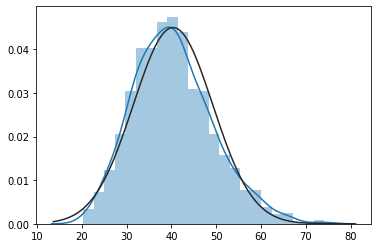

In [47]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed= 1234)

# 자유도: 40, 데이터 수: 1000개의 x2 분포를 따르는 데이터 생성
chisq_df40 = np.random.chisquare(df = 40, size = 1000)

# histogram, fit:정규부포 선 생성, kde: x2 분포의 kde 생성 안함
# sns.distplot(chisq_df10, fit = stats.norm, kde = False)
sns.distplot(chisq_df40, fit = stats.norm, kde = True)

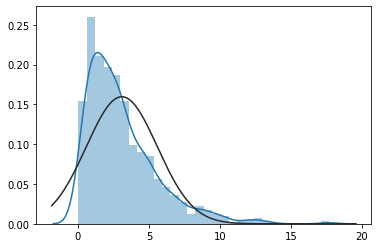

In [48]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed= 1234)

# 자유도: 3, 데이터 수: 1000개의 x2 분포를 따르는 데이터 생성
chisq_df3 = np.random.chisquare(df = 3, size = 1000)
# histogram, fit:정규부포 선 생성, kde: x2 분포의 kde 생성 안함
# sns.distplot(chisq_df10, fit = stats.norm, kde = False)
sns.distplot(chisq_df3, fit = stats.norm, kde = True)

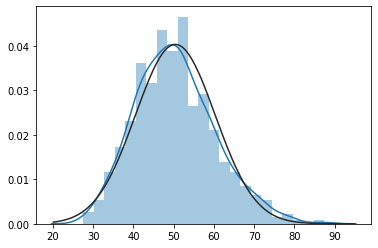

In [49]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed= 1234)

# 자유도: 40, 데이터 수: 1000개의 x2 분포를 따르는 데이터 생성
chisq_df50 = np.random.chisquare(df = 50, size = 1000)

# histogram, fit:정규부포 선 생성, kde: x2 분포의 kde 생성 안함
# sns.distplot(chisq_df10, fit = stats.norm, kde = False)
sns.distplot(chisq_df50, fit = stats.norm, kde = True)

In [50]:
# 카이제곱 분포 연습
chisq = 10
df = 30
# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.4f}".format(chisq, prob))

P(X<=10) : 0.0002


In [51]:
# 카이제곱 분포 실습
chisq = 3
df = 8

# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.4f}".format(chisq, prob))

P(X<=3) : 0.0656


# F 분포

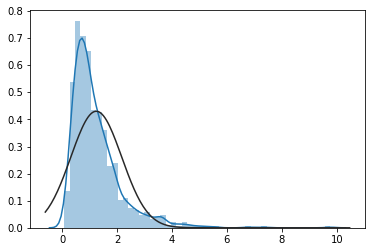

In [52]:
# 연습 (F 분포)
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 분자 자유도: 10, 분모 자유도: 10
# 데이터 수: 1000개의 F 분포를 따르는 데이터 생성
F_df10_10 = np.random.f(dfnum= 10, dfden = 10, size = 1000)

# histogram, fit: 정규분포 선 생성, kde: F 분포의 kde 생성 안 함
# sns.distdf_auto.g
# plot(F_df10_10, fit = stats.norm, kde = False)
sns.distplot(F_df10_10, fit = stats.norm, kde = True)

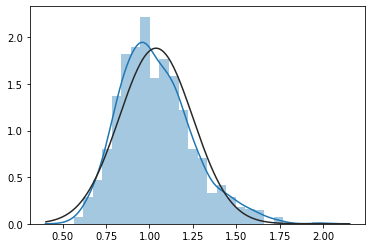

In [53]:
# 연습 (F 분포)
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 분자 자유도: 10, 분모 자유도: 10
# 데이터 수: 1000개의 F 분포를 따르는 데이터 생성
F_df100_100 = np.random.f(dfnum= 100, dfden = 100, size = 1000)

# histogram, fit: 정규분포 선 생성, kde: F 분포의 kde 생성 안 함
# sns.distplot(F_df100_100, fit = stats.norm, kde = False)
sns.distplot(F_df100_100, fit = stats.norm, kde = True)

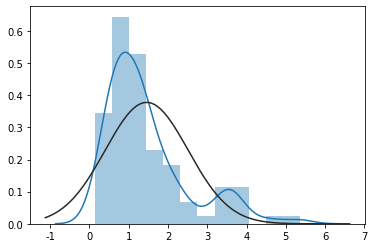

In [54]:
# 실습_F-분포
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 분자 자유도: 10, 분모 자유도: 10
# 데이터 수: 100개의 F 분포를 따르는 데이터 생성
F_df10_10 = np.random.f(dfnum= 10, dfden = 10, size = 100)

# histogram, fit: 정규분포 선 생성, kde: F 분포의 kde 생성 안 함
# sns.distplot(F_df100_100, fit = stats.norm, kde = False)
sns.distplot(F_df10_10, fit = stats.norm, kde = True)

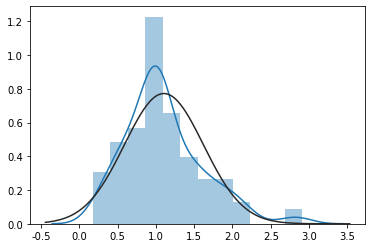

In [55]:
# 실습_F-분포
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 분자 자유도: 10, 분모 자유도: 10
# 데이터 수: 1000개의 F 분포를 따르는 데이터 생성
F_df100_50 = np.random.f(dfnum= 10, dfden = 50, size = 100)

# histogram, fit: 정규분포 선 생성, kde: F 분포의 kde 생성 안 함
# sns.distplot(F_df100_100, fit = stats.norm, kde = False)
sns.distplot(F_df100_50, fit = stats.norm, kde = True)

In [56]:
# 연습 F-분포
f = 2.0
dfnum = 15
dfden = 15

# 누적확률 값 계산
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.904


In [57]:
# 연습 F-분포
f = 1.5
dfnum = 10
dfden = 100

# 누적확률 값 계산
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


In [58]:
# [참조] F-분포
f = 147
dfnum = 1
dfden = 3

# 누적확률 값 계산
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X>=F): {:.3f}".format(1-prob))

P(X>=F): 0.001


# 와이블분포

In [59]:
x = 1500
alpha = 2.2
beta = 1200
# 누적확률 값 계산
prob = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>=x): {:.3f}".format(1-prob))

P(X>=x): 0.195


In [60]:
x = 2500
alpha = 5.2
beta = 2200
# 누적확률 값 계산
prob = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>=x): {:.3f}".format(1-prob))

P(X>=x): 0.143
